<a href="https://colab.research.google.com/github/lalashiwoya/Abstractive-Text-Summarization-Using-Sequence-to-Sequence-Rnn/blob/master/final2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cd drive/My\ Drive/Hiwi_corona/corona_RNN

/content/drive/My Drive/Hiwi_corona/corona_RNN


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

TIME_STEP=1
AFTER_DAY=1
BATCH_SIZE=1
EPOCHS=100 

In [45]:
feature_set=['uk','us','mcx','dji','dax']
feature_dict={'vader':0,'flair':1,'uk':2,'us':3,'ge':4,'mcx':5,'dji':6,'dax':7}
features=[]
for item in feature_set:
  features.append(feature_dict[item])

data = pd.read_csv('data.csv')
data = np.array(data,dtype=np.float32)
data = data[:,features]
features=np.arange(len(features))

In [46]:
from sklearn.preprocessing import RobustScaler 
scaler=RobustScaler().fit(data)
data=scaler.transform(data)
data_with_date=np.column_stack((data,np.arange(len(data))))

In [47]:
def load_data(data, time_step=5, after_day=1, features=features,split=10): 
    seq_length = time_step + after_day
    results=[]
    for index in range(len(data)-seq_length+1):
      results.append(data[index:index+seq_length])
    results=np.array(results)

    train_idx=[0,1,2,4,5,6,8]
    #val_idx=[3,7,9]

    train_split=[]
    val_split=[]

    division=results.shape[0]/float(split)

    for i in range(results.shape[0]):
      if i in train_idx:
        for j in range(int(division)):
          if int(round(i*division+j))<len(results):
            train_split.append(results[int(round(i*division+j))])
      else:
        for j in range(int(division)):
          if int(round(i*division+j))<len(results):
            val_split.append(results[int(round(i*division+j))])
      
    train_split=np.array(train_split)
    val_split=np.array(val_split)

    x_train = train_split[:, :time_step]
    y_train = train_split[:, time_step:]
    x_val = val_split[:, :time_step]
    y_val = val_split[:, time_step:]


    x_train=np.append(x_train[:,:,:features],np.expand_dims(x_train[:,:,-1],axis=-1),axis=2)
    y_train=np.append(y_train[:,:,:features],np.expand_dims(y_train[:,:,-1],axis=-1),axis=2)
    x_val=np.append(x_val[:,:,:features],np.expand_dims(x_val[:,:,-1],axis=-1),axis=2)
    y_val=np.append(y_val[:,:,:features],np.expand_dims(y_val[:,:,-1],axis=-1),axis=2)
    
    return x_train,y_train,x_val,y_val

In [48]:
x_train,y_train,x_val,y_val=load_data(data=data_with_date, time_step=TIME_STEP, after_day=AFTER_DAY, features=len(features),split=10)

In [27]:
y_train.shape

(84, 1, 6)

In [49]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, RepeatVector, Dropout, Activation,LeakyReLU
def simpleLSTM(input_shape,feature_len):
   model = Sequential()
   model.add(LSTM(32, input_shape=input_shape, return_sequences=True))
   model.add(Dropout(0.2))
   model.add(LSTM(16, input_shape=input_shape, return_sequences=False))
   model.add(Dropout(0.2))
   model.add(Dense(feature_len-1))
   #adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
   model.compile(loss='mse', optimizer="adam", metrics=['accuracy'])
   return model

In [50]:
feature_len=len(features)+1
input_shape=(TIME_STEP,feature_len)
checkpoint_path='model/best_model.ckpt'
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True,verbose=1)
model=simpleLSTM(input_shape=input_shape,feature_len=feature_len)

In [51]:
model.fit(x_train, y_train[:,:,:-1], epochs=EPOCHS, validation_data=(x_val, y_val[:,:,:-1]),callbacks=[cp_callback],batch_size=1,shuffle=False)

Epoch 1/100
69/84 [=======================>......] - ETA: 0s - loss: 0.7757 - accuracy: 0.2464
Epoch 00001: saving model to model/best_model.ckpt
84/84 [==============================] - 1s 13ms/step - loss: 0.6544 - accuracy: 0.2619 - val_loss: 0.3584 - val_accuracy: 0.4444
Epoch 2/100
69/84 [=======================>......] - ETA: 0s - loss: 0.7005 - accuracy: 0.3623
Epoch 00002: saving model to model/best_model.ckpt
84/84 [==============================] - 0s 4ms/step - loss: 0.5892 - accuracy: 0.4167 - val_loss: 0.3582 - val_accuracy: 0.4444
Epoch 3/100
73/84 [=========================>....] - ETA: 0s - loss: 0.4870 - accuracy: 0.4384
Epoch 00003: saving model to model/best_model.ckpt
84/84 [==============================] - 0s 4ms/step - loss: 0.4305 - accuracy: 0.4405 - val_loss: 0.3680 - val_accuracy: 0.4444
Epoch 4/100
71/84 [========================>.....] - ETA: 0s - loss: 0.2656 - accuracy: 0.3380
Epoch 00004: saving model to model/best_model.ckpt
84/84 [=====================

In [52]:
model.load_weights(checkpoint_path)

In [53]:
def rmse(predictions, test_data):
    """
    :param predictions: predicted series
    :param test_data: the actual series
    :return: Root Mean Squared Error (RMSE)
    """
    residuals = test_data - predictions
    return np.sqrt(np.mean(residuals ** 2))

In [54]:
pred_train=model.predict(x_train)
pred_val=model.predict(x_val)

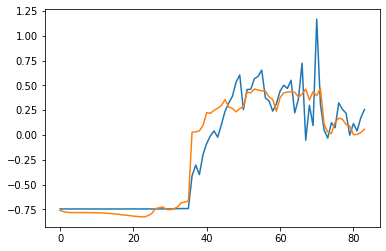

In [56]:
plt.plot(y_train[:,:,1])
plt.plot(pred_train[:,1])

In [279]:
pred_train.shape

(90, 5)

In [ ]:
def get_single_day(data):
  

In [293]:
y_train[:,:,:-1].shape

(90, 1, 5)

In [396]:
actual_train_inv=scaler.inverse_transform(np.squeeze(y_train[:,:,:-1]))
actual_val_inv=scaler.inverse_transform(np.squeeze(y_val[:,:,:-1]))

In [57]:
pred_train_inv=scaler.inverse_transform(pred_train)
pred_val_inv=scaler.inverse_transform(pred_val)

In [59]:
pred_train_inv[:,1]

array([-3.6382031e+02, -6.9343750e+02, -8.4175586e+02, -9.2766602e+02,
       -9.3021484e+02, -9.1717383e+02, -9.2000586e+02, -9.2175000e+02,
       -9.3289844e+02, -9.6523047e+02, -9.5848438e+02, -9.8243750e+02,
       -1.0460820e+03, -1.1138301e+03, -1.1915898e+03, -1.2785566e+03,
       -1.3716992e+03, -1.4999531e+03, -1.5848867e+03, -1.6915820e+03,
       -1.8290996e+03, -1.9181680e+03, -1.9968398e+03, -2.0302539e+03,
       -1.6977812e+03, -1.1894746e+03,  9.8837891e+01,  3.0681445e+02,
        5.1996094e+02, -9.2890625e+01, -2.0962500e+02,  2.7779297e+01,
        4.8999609e+02,  1.5396465e+03,  1.7675352e+03,  2.0154492e+03,
        1.9626623e+04,  1.9732061e+04,  1.9972498e+04,  2.1412719e+04,
        2.4666625e+04,  2.4459490e+04,  2.5226668e+04,  2.5790967e+04,
        2.6462902e+04,  2.7993719e+04,  2.6085553e+04,  2.5741592e+04,
        2.4849381e+04,  2.5664203e+04,  2.6181984e+04,  2.9850875e+04,
        2.9697373e+04,  3.0683641e+04,  3.0413916e+04,  3.0236914e+04,
      

In [406]:
prediction[:,1]

array([-2691.9883, -2688.5059, -2686.6504, -2684.875 , -2683.498 ,
       -2681.8008, -2678.963 , -2675.5547, -2670.6836, -2661.8125,
       -2654.8223, -2641.8047, -2610.6504, -2559.668 , -2476.8496,
       -2348.4492, -2159.1172, -1894.2871, -1702.3047, -1498.2461,
       -1372.5   , -1315.2129, -1276.8047, -1314.3379, -1340.2227,
       -1404.8379, -1487.4121, -1617.1816, -1637.3945, -1624.2363,
       -1585.7012, -1609.6289, -1609.6289, -1648.0352, -1648.0352,
       -1287.7832, -1287.7832,  1530.6602,  1530.6602,  3180.9268,
        3180.9268,  5735.341 ,  5735.341 , 12729.297 , 12729.297 ,
       36559.016 , 36596.453 , 36094.848 , 33863.17  , 32885.043 ,
       31671.96  , 31036.148 , 30597.684 , 29869.348 , 29583.887 ,
       28329.996 , 28969.902 , 29753.102 , 29804.36  , 29727.953 ,
       29428.502 , 29032.91  , 29505.617 , 29876.113 , 28965.52  ,
       29326.832 , 28846.314 , 29322.17  , 27302.074 , 25437.773 ,
       24806.393 , 24594.535 , 26082.766 , 26254.098 , 25899.5

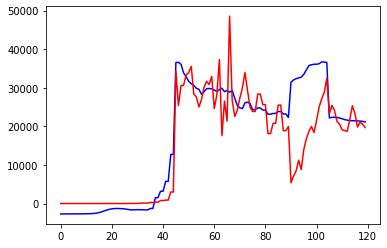

In [399]:
import matplotlib.pyplot as plt
prediction=np.append(pred_train_inv,pred_val_inv,axis=0)
scaled=np.append(actual_train_inv,actual_val_inv,axis=0)
scaled_us=pd.DataFrame(data=scaled[:,1],columns=['us'])
prediction_us=pd.DataFrame(data=prediction[:,1],columns=['us'])
plt.plot(prediction_us.us, 'b', label='Prediction')
plt.plot(scaled_us.us, 'r', label='Scaled')

In [ ]:
import matplotlib.pyplot as plt
prediction=np.append(pred_train_inv,pred_val_inv,axis=0)
scaled=np.append(scaled_train_inv,scaled_val_inv,axis=0)
actual=np.append(actual_train,actual_val,axis=0)

prediction_us=pd.DataFrame(data=prediction[:,3],columns=['us'])
scaled_us=pd.DataFrame(data=scaled[:,3],columns=['us'])
actual_us=pd.DataFrame(data=actual[:,3],columns=['us'])
plt.plot(prediction_us.us, 'b', label='Prediction')
#plt.plot(scaled_us.us, 'r', label='Scaled')
plt.plot(actual_us.us, 'g', label='actual')